In [11]:
import numpy as np
from scipy.spatial.transform import Rotation

In [14]:
src = np.array([[0,1,0]])
dest = np.array([[1,0,0]])

r = Rotation.align_vectors(src, dest)
r

/tmp/ipykernel_7723/1554867788.py:4: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  r = Rotation.align_vectors(src, dest)


(<scipy.spatial.transform.rotation.Rotation at 0x7f3919348300>, 0.0)

In [ ]:
# some confusing shit about plotting I guess. Thanks for nothing Orix.

In [4]:
# Exchange "inline" for:
# "qt5" for interactive plotting from the pyqt package
# "notebook" for inline interactive plotting when running on Binder
%matplotlib inline

import tempfile
import numpy as np
import matplotlib.pyplot as plt
from orix import vector


# We'll want our plots to look a bit larger than the default size
new_params = {
    "figure.figsize": (10, 5),
    "lines.markersize": 10,
    "font.size": 20,
    "axes.grid": False,
}
plt.rcParams.update(new_params)


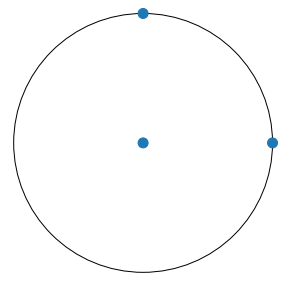

In [5]:
v1 = vector.Vector3d([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
v1.scatter()

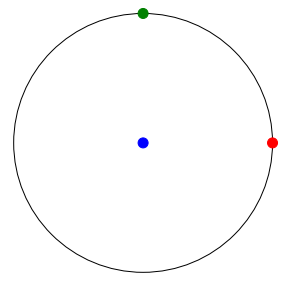

In [6]:
temp_dir = tempfile.mkdtemp() + "/"  # Write to a temporary directory
vector_file = temp_dir + "vectors.png"
fig0 = v1.scatter(c=["r", "g", "b"], return_figure=True)
fig0.savefig(vector_file, bbox_inches="tight", pad_inches=0)

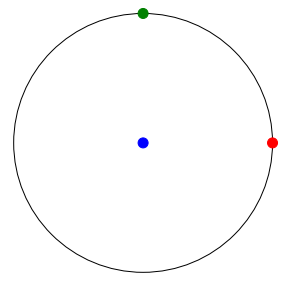

In [7]:
fig, ax = plt.subplots(subplot_kw=dict(projection="stereographic"))
ax.scatter(v1, c=["r", "g", "b"])

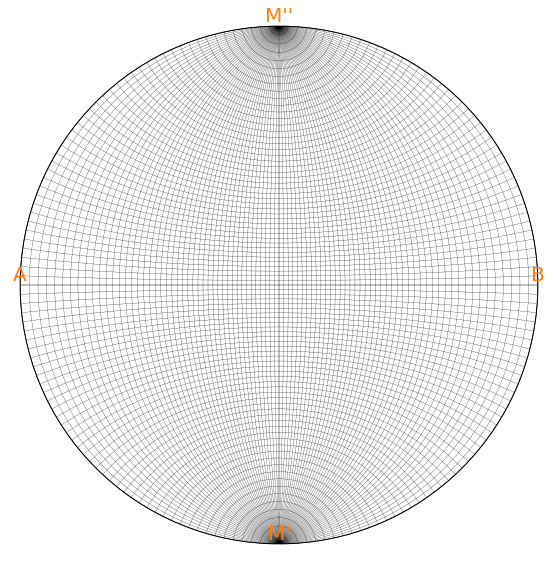

In [8]:
n = int(90 / 2)  # Degree / net resolution
steps = 500
kwargs = dict(linewidth=0.25, color="k")

polar = np.linspace(0, 0.5 * np.pi, num=n)
v_right = vector.Vector3d.from_polar(azimuth=np.zeros(n), polar=polar)
v_left = vector.Vector3d.from_polar(azimuth=np.ones(n) * np.pi, polar=polar)
v010 = vector.Vector3d.zero(shape=(n,))
v010.y = 1
v010_opposite = -v010

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection="stereographic"))
ax.stereographic_grid(False)
ax.draw_circle(v_right, steps=steps, **kwargs)
ax.draw_circle(v_left, steps=steps, **kwargs)
ax.draw_circle(v010, opening_angle=polar, steps=steps, **kwargs)
ax.draw_circle(v010_opposite, opening_angle=polar, steps=steps, **kwargs)
for label, azimuth in zip(["B", "M''", "A", "M'"], np.array([0, 0.5, 1, 1.5]) * np. pi):
    ax.text(azimuth, 0.5 * np.pi, s=label, c="C1")



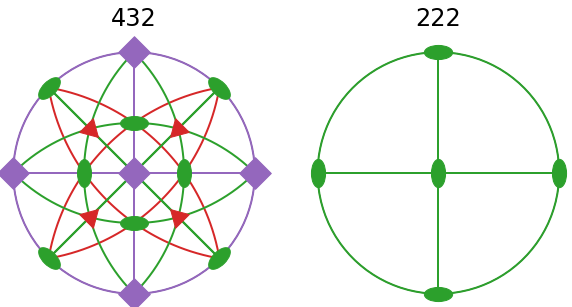

In [9]:
fig, ax = plt.subplots(ncols=2, subplot_kw=dict(projection="stereographic"))

marker_size = 500
ax[0].stereographic_grid(False)
ax[0].set_title("432", pad=20)
# 4-fold (outer markers will be clipped a bit...)
v4fold = vector.Vector3d(
    [[0, 0, 1], [1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0]]
)
ax[0].symmetry_marker(v4fold, fold=4, c="C4", s=marker_size)
ax[0].draw_circle(v4fold, color="C4")
# 3-fold
v3fold = vector.Vector3d([[1, 1, 1], [1, -1, 1], [-1, -1, 1], [-1, 1, 1]])
ax[0].symmetry_marker(v3fold, fold=3, c="C3", s=marker_size)
ax[0].draw_circle(v3fold, color="C3")
# 2-fold
v2fold = vector.Vector3d([
    [1, 0, 1],
    [0, 1, 1],
    [-1, 0, 1],
    [0, -1, 1],
    [1, 1, 0],
    [-1, -1, 0],
    [-1, 1, 0],
    [1, -1, 0],
])
ax[0].symmetry_marker(v2fold, fold=2, c="C2", s=marker_size)
ax[0].draw_circle(v2fold, color="C2")

ax[1].stereographic_grid(False)
ax[1].set_title("222", pad=20)
# 2-fold
v2fold = vector.Vector3d([
    [0, 0, 1], [1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0]
])
ax[1].symmetry_marker(v2fold, fold=2, c="C2", s=800)
ax[1].draw_circle(v2fold, color="C2")